<a href="https://colab.research.google.com/github/JulioAgustinT/Juego-Amigo-secreto/blob/main/Creemos_una_LLM_desde_0!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformer y Attention para Análisis de Sentimientos con IMDB


## Introducción

### ¿Qué es un Transformer?

El Transformer es una arquitectura clave en el mundo del procesamiento de lenguaje natural (NLP). A diferencia de las redes recurrentes, que procesan las secuencias palabra por palabra, el Transformer utiliza el mecanismo de **Attention** para procesar secuencias completas a la vez, permitiendo que el modelo preste atención a diferentes partes de la entrada simultáneamente. Esto resulta en un rendimiento mucho mejor para secuencias largas y tareas como traducción, resumen y análisis de sentimientos.

### ¿Qué es Attention?

<figure>
<center>
<img src='https://www.dropbox.com/s/91xzqre8dpvxrux/sentence.png?raw=1' alt="drawing" width="350" />
<figcaption>La relevancia cambia con el contexto</figcaption></center>
</figure>

El mecanismo de Attention permite al modelo "enfocarse" en diferentes partes de la secuencia de entrada. En lugar de procesar una palabra a la vez, el modelo pondera la relevancia de otras palabras mientras procesa una palabra específica. Es como realizar consultas en una base de datos, donde:

- **Query** es la palabra que se está procesando.
- **Key** es lo que se evalúa para cada palabra.
- **Value** es la información relevante que se recupera.


<figure>
<center>
<img src='https://www.dropbox.com/s/ahn8ogriuzasa9a/attention_in_detail.png?raw=1'  />
<figcaption>Attention</figcaption></center>
</figure>


### Implementación del Transformer

<table>
<tr>
  <th colspan=1>El Transformer original (Optimus Prime)</th>
  <th colspan=1>Un 4-layer Transformer</th>
</tr>
<tr>
  <td>
   <img width=400 src="https://www.tensorflow.org/images/tutorials/transformer/transformer.png"/>
  </td>
  <td>
   <img width=307 src="https://www.tensorflow.org/images/tutorials/transformer/Transformer-4layer-compact.png"/>
  </td>
</tr>
</table>


En la imagen anterior, se puede ver cómo el mecanismo de atención asigna diferentes niveles de importancia (o "atención") entre diferentes palabras de la oración.

Ahora vamos a implementar un Transformer para análisis de sentimientos en el conjunto de datos **IMDB**. Utilizaremos embeddings preentrenados con **Word2Vec** y el dataset de reseñas de IMDB de Hugging Face.


In [2]:
!pip install datasets tensorflow

In [3]:
from datasets import load_dataset
import tensorflow as tf
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import numpy as np

# Cargar el dataset IMDB desde Hugging Face
dataset = load_dataset("stanfordnlp/imdb")
train_data = dataset['train']  # Datos de entrenamiento
test_data = dataset['test']  # Datos de prueba

# Función para preprocesar los textos: convierte las reseñas a listas de palabras en minúsculas
def preprocess_texts(texts):
    return [simple_preprocess(review) for review in texts]  # Tokeniza y convierte a minúsculas cada reseña

# Preprocesar los textos del conjunto de entrenamiento y prueba
train_texts = preprocess_texts(train_data['text'])  # Procesa las reseñas de entrenamiento
test_texts = preprocess_texts(test_data['text'])  # Procesa las reseñas de prueba

# Convertir las etiquetas (positivas o negativas) en arrays de NumPy
train_labels = np.array(train_data['label'])  # Etiquetas de las reseñas de entrenamiento
test_labels = np.array(test_data['label'])  # Etiquetas de las reseñas de prueba


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [4]:
# Entrenar un modelo Word2Vec en el corpus de reseñas preprocesadas de IMDB
# El modelo genera embeddings de palabras con un vector de tamaño 100, una ventana de contexto de 5 palabras,
# y solo considera palabras que aparecen al menos una vez. Utiliza 4 hilos (workers) para entrenamiento paralelo
# y entrena el modelo durante 10 épocas.
word2vec_model = Word2Vec(train_texts, vector_size=100, window=5, min_count=1, workers=4, epochs=10)

# Crear una matriz de embeddings donde cada fila es el vector de representación de una palabra
vocab_size = len(word2vec_model.wv)  # Tamaño del vocabulario generado por Word2Vec
embedding_matrix = np.zeros((vocab_size, 100))  # Inicializar la matriz de embeddings con ceros, de tamaño vocab_size x 100

# Llenar la matriz de embeddings con los vectores correspondientes de cada palabra en el vocabulario
for i, word in enumerate(word2vec_model.wv.index_to_key):  # Itera sobre cada palabra en el vocabulario
    embedding_matrix[i] = word2vec_model.wv[word]  # Asigna el vector de la palabra a la fila correspondiente en la matriz


In [ ]:
embedding_matrix

array([[-1.00053871,  0.55335605,  0.42214832, ..., -0.22688939,
         0.35522845, -0.32106352],
       [-0.38874197, -0.35609403,  0.38192663, ...,  0.44412586,
        -0.26970783,  1.46419859],
       [-1.28239918, -0.87442774, -0.28956783, ...,  0.86137444,
         0.18307775, -0.25247562],
       ...,
       [ 0.00548375, -0.01085785,  0.01417805, ..., -0.0115383 ,
         0.00894614, -0.04862797],
       [ 0.01519552, -0.00492085,  0.05473417, ..., -0.0483714 ,
         0.03662043, -0.05481586],
       [-0.02249526,  0.02618464,  0.00446428, ...,  0.03561862,
        -0.02971842,  0.01440075]])

In [6]:
class PositionalEncoding(tf.keras.layers.Layer):
    def call(self, inputs):
        # Obtén las dimensiones de la secuencia y el tamaño del embedding
        seq_len = tf.shape(inputs)[1]
        d_model = tf.shape(inputs)[-1]

        # Calcula las posiciones para cada elemento de la secuencia
        position = tf.cast(tf.range(seq_len), tf.float32)[:, tf.newaxis]
        div_term = tf.math.pow(10000.0, tf.range(0, d_model, 2, dtype=tf.float32) / tf.cast(d_model, tf.float32))

        # Aplica las funciones senoidal y cosenoidal a las posiciones
        angle_rads = position / div_term
        sines = tf.math.sin(angle_rads)
        cosines = tf.math.cos(angle_rads)

        # Combina senos y cosenos para formar la codificación posicional
        pos_encoding = tf.concat([sines, cosines], axis=-1)
        pos_encoding = pos_encoding[tf.newaxis, ...]

        # Devuelve la entrada sumada con la codificación posicional
        return inputs + pos_encoding[:, :seq_len, :]


In [8]:
# Definir una clase personalizada para el codificador Transformer (Transformer Encoder)
class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, num_heads, dff, d_model, rate=0.1):
        super(TransformerEncoder, self).__init__()

        # Capa de atención multi-cabezal (Multi-Head Attention)
        # num_heads: número de cabezales de atención, key_dim: dimensión de las claves (y las consultas y valores)
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)

        # Capa de red neuronal feed-forward (FFN) secuencial que consiste en:
        # - Una capa densa con activación ReLU que aumenta la dimensionalidad a dff
        # - Una capa densa que reduce la dimensionalidad de vuelta a d_model
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='relu'),  # Primera capa de la FFN
            tf.keras.layers.Dense(d_model)  # Segunda capa, devuelve la dimensión original d_model
        ])

        # Normalización por capas para estabilizar el entrenamiento
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)  # Primer layer norm
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)  # Segundo layer norm

        # Dropout para prevenir sobreajuste, con una tasa de rate
        self.dropout1 = tf.keras.layers.Dropout(rate)  # Dropout después de la atención multi-cabezal
        self.dropout2 = tf.keras.layers.Dropout(rate)  # Dropout después de la red FFN

    # Definir la llamada del codificador, que se ejecuta al pasar datos a través de la capa
    def call(self, x, training=False):
        # Aplicar atención multi-cabezal, utilizando x como las consultas, claves y valores
        attn_output = self.mha(x, x, x)
        # Aplicar dropout a la salida de la atención
        attn_output = self.dropout1(attn_output, training=training)
        # Normalización por capas después de agregar la entrada original (residual) a la salida de atención
        out1 = self.layernorm1(x + attn_output)

        # Aplicar la red FFN a la salida de la atención normalizada
        ffn_output = self.ffn(out1)
        # Aplicar dropout a la salida de la FFN
        ffn_output = self.dropout2(ffn_output, training=training)
        # Normalización por capas después de agregar la salida normalizada de la FFN al residual
        return self.layernorm2(out1 + ffn_output)


In [9]:
# Función para construir el modelo usando el codificador Transformer
def build_model(vocab_size, embedding_dim, max_length):
    # Definir la entrada del modelo con la forma de la secuencia de entrada
    inputs = tf.keras.Input(shape=(max_length,))  # Entrada con la longitud máxima de la secuencia

    # Capa de embedding que convierte las palabras en vectores (embeddings)
    # vocab_size: tamaño del vocabulario, embedding_dim: dimensión de los embeddings
    # weights=[embedding_matrix]: usamos la matriz de embeddings preentrenada, y la capa no es entrenable (trainable=False)
    x = tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False)(inputs)

    # Aplicar codificación posicional para agregar información sobre el orden de las palabras en la secuencia
    x = PositionalEncoding()(x)

    # Añadir bloques de Encoder Transformer
    x = TransformerEncoder(num_heads=3, dff=1024, d_model=100)(x)  # Primer bloque de Encoder
    x = TransformerEncoder(num_heads=3, dff=1024, d_model=100)(x)  # Segundo bloque de Encoder

    # Capa de pooling global que resume la secuencia de entrada en un solo vector
    x = tf.keras.layers.GlobalAveragePooling1D()(x)

    # Capa densa con 1024 unidades y activación ReLU para aprender representaciones no lineales
    x = tf.keras.layers.Dense(1024, activation='relu')(x)

    # Capa de Dropout con tasa 0.5 para reducir el sobreajuste
    x = tf.keras.layers.Dropout(0.5)(x)

    # Capa de salida con una neurona y activación sigmoide para realizar una clasificación binaria
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    # Crear el modelo final conectando las entradas y salidas
    model = tf.keras.Model(inputs, outputs)

    # Compilar el modelo con el optimizador Adam, la pérdida binaria cruzada y la métrica de precisión
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model  # Devolver el modelo construido

# Definir hiperparámetros y entrenar el modelo
max_length = 256  # Longitud máxima de las reseñas
model = build_model(vocab_size, 100, max_length)  # Construir el modelo
model.summary()  # Mostrar el resumen del modelo


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding (Embedding)       (None, 256, 100)          7329300   
                                                                 
 positional_encoding (Posit  (None, 256, 100)          0         
 ionalEncoding)                                                  
                                                                 
 transformer_encoder (Trans  (None, 256, 100)          327324    
 formerEncoder)                                                  
                                                                 
 transformer_encoder_1 (Tra  (None, 256, 100)          327324    
 nsformerEncoder)                                                
                                                             

In [10]:
# Crear una lista de palabras que usaremos para el mapeo
vocab = list(word2vec_model.wv.index_to_key)

# Crear la capa StringLookup para convertir palabras en índices
lookup_layer = tf.keras.layers.StringLookup(vocabulary=vocab, num_oov_indices=1, mask_token=None)

# Convertir las listas de palabras a tensores ragged
train_ragged = tf.ragged.constant(train_texts)
test_ragged = tf.ragged.constant(test_texts)

# Aplicar StringLookup de manera vectorizada a los tensores ragged
train_sequences = lookup_layer(train_ragged)
test_sequences = lookup_layer(test_ragged)

# Convertir las secuencias ragged a tensores regulares con padding
train_data_padded = train_sequences.to_tensor(default_value=0, shape=[None, max_length])
test_data_padded = test_sequences.to_tensor(default_value=0, shape=[None, max_length])


In [ ]:
train_data_padded[0]

<tf.Tensor: shape=(256,), dtype=int64, numpy=
array([ 1578,   233,  1953,  4025,    34,    56,   360,  1086,    82,
           3,    27,     1,  7010,    10,  3347,     7,    50,     7,
          11,    80,   609,     8,    78,   541,    10,    28,    80,
           7,    11, 19764,    30,  9273,    42,     7,   120,   776,
           4,  2475,     9,   650,  1586,   107,   325,     3,   103,
        1159,  3052,    61,    64,     4,    62,     9,    13,   529,
           6,     6,     1,   108,     5,  3926,   181,   179,  3879,
         442,  1394,   750,  4252,    32,   477,     4,   826,   278,
          49,    47,    40,   106,     8,   817,    49,   477,     4,
        1112,    37, 11695,     4,   222,    45,   422,     3,   637,
          19,    44,     1,   825, 28679,   190,    40,   785,   966,
        1302,   136,    12,     1,  2505,   315,     2,  1472,  1302,
           8,     1,  2293,  1579,     8,   193,  2202,  7223,     2,
        1915, 19783,     3, 19929,    40,   

In [11]:

model.fit(train_data_padded, train_labels, epochs=5, batch_size=128, validation_data=(test_data_padded, test_labels))


Epoch 1/5
196/196 [==============================] - 42s 157ms/step - loss: 0.6378 - accuracy: 0.6284 - val_loss: 0.5804 - val_accuracy: 0.7026
Epoch 2/5
196/196 [==============================] - 31s 158ms/step - loss: 0.5282 - accuracy: 0.7352 - val_loss: 0.4911 - val_accuracy: 0.7594
Epoch 3/5
196/196 [==============================] - 33s 171ms/step - loss: 0.4769 - accuracy: 0.7732 - val_loss: 0.5411 - val_accuracy: 0.7390
Epoch 4/5
196/196 [==============================] - 34s 174ms/step - loss: 0.4524 - accuracy: 0.7903 - val_loss: 0.4928 - val_accuracy: 0.7716
Epoch 5/5
196/196 [==============================] - 34s 173ms/step - loss: 0.4211 - accuracy: 0.8077 - val_loss: 0.4247 - val_accuracy: 0.8032


In [14]:
import numpy as np

ix = np.random.randint(0, len(test_texts))

# Escoger una nueva reseña del conjunto de prueba
new_review = test_texts[ix]

# Convertir la reseña a un tensor ragged
new_review_ragged = tf.ragged.constant([new_review])

# Aplicar la capa StringLookup para convertir las palabras a índices
new_review_sequence = lookup_layer(new_review_ragged)

# Rellenar la secuencia para que tenga la misma longitud que en el entrenamiento
new_review_padded = new_review_sequence.to_tensor(default_value=0, shape=[None, max_length])

# Hacer la predicción
prediction = model.predict(new_review_padded)

# Convertir la predicción en "Positivo" o "Negativo" basado en el umbral 0.5
sentiment = "Positivo" if prediction >= 0.5 else "Negativo"

# Imprimir la reseña original y el resultado de la predicción
print(f"Reseña: {' '.join(new_review)}")
print(f"Sentimiento predicho: {sentiment}")


1/1 [==============================] - 0s 20ms/step
Reseña: this is an action packed film that makes me feel very peaceful and relaxed every time see it the film short of its conclusion demonstrates that in the face of extreme odds it is still possible to prevail br br this film is very refreshing and likely to be banned at any moment get copy of it before the thought police burn every copy they can find they don want you to have hope for the future or to think you have chance br br on the other hand should political correctness fail to supress it this would be an excellent movie to release on dvd such release could contain interviews with the writer and director and related goodies sure it would sell some copies and would be one of the first to buy it br br mincka
Sentimiento predicho: Positivo


## Bonus: Usando BERT como capa de Embedding


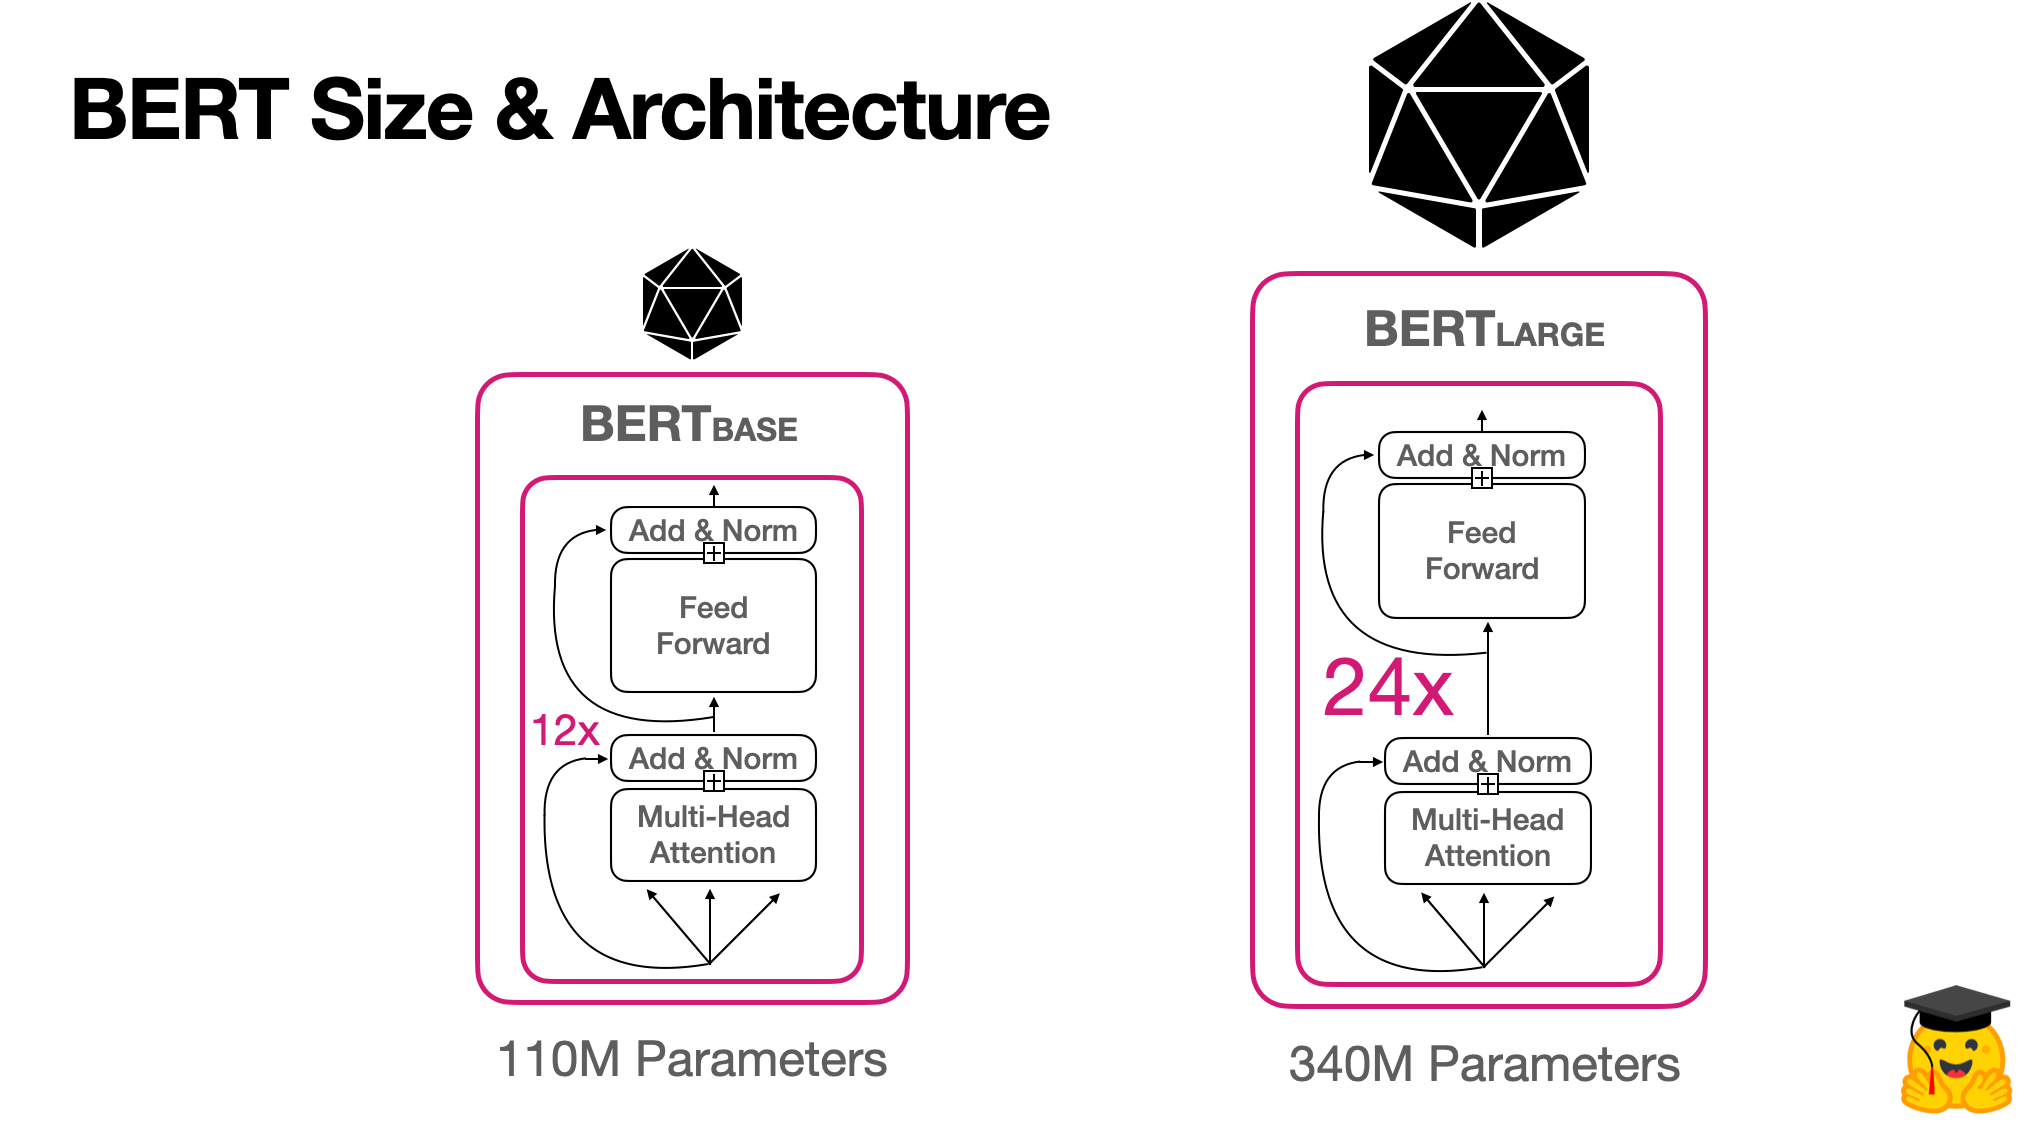

In [15]:

from transformers import TFBertModel, BertTokenizer

# Cargar el modelo preentrenado de BERT y el tokenizer
bert_model = TFBertModel.from_pretrained('bert-base-uncased', trainable=True)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [16]:
encoder_layers = bert_model.layers[0].encoder.layer
# Ver el número de capas en el encoder
print(f"Número de capas en el encoder: {len(encoder_layers)}")

Número de capas en el encoder: 12


In [17]:
# Congelar las primeras 12 capas del modelo BERT para que no se entrenen
for layer in encoder_layers[:12]:  # Iterar sobre las primeras 12 capas del codificador BERT
    for sub_layer in layer.submodules:  # Iterar sobre los submódulos dentro de cada capa
        sub_layer.trainable = False  # Congelar cada submódulo, es decir, no actualizar sus pesos durante el entrenamiento

# Mostrar el resumen del modelo BERT para verificar qué capas están congeladas
bert_model.summary()  # Ver el resumen del modelo, incluyendo el número de capas entrenables y no entrenables


Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
Total params: 109482240 (417.64 MB)
Trainable params: 24427776 (93.18 MB)
Non-trainable params: 85054464 (324.46 MB)
_________________________________________________________________


In [18]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar las reseñas
def tokenize_texts(texts):
    return tokenizer(texts, padding='max_length', truncation=True, max_length=256, return_tensors='tf')

train_tokenized = tokenize_texts(train_data['text'])
test_tokenized = tokenize_texts(test_data['text'])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [19]:
class BertLayer(tf.keras.layers.Layer):
    def __init__(self, bert_model):
        super(BertLayer, self).__init__()
        self.bert_model = bert_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        output = self.bert_model(input_ids=input_ids, attention_mask=attention_mask)[0]
        return output

In [20]:
def build_model_with_bert():
    input_ids = tf.keras.Input(shape=(256,), dtype=tf.int32, name="input_ids")
    attention_mask = tf.keras.Input(shape=(256,), dtype=tf.int32, name="attention_mask")

    # Usar la capa personalizada de BERT
    bert_output = BertLayer(bert_model)([input_ids, attention_mask])

    # Agregar capas Transformer Encoder
    x = TransformerEncoder(num_heads=3, dff=1024, d_model=768)(bert_output)
    x = TransformerEncoder(num_heads=3, dff=1024, d_model=768)(x)

    # Capa de Pooling global y capas densas adicionales
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)  # Reducimos el dropout a 0.3

    # Añadir más capas densas para mejorar la capacidad del modelo
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)  # Reducimos el dropout

    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=outputs)

    # Usar Adam con una tasa de aprendizaje baja
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Construir el modelo
model_with_bert = build_model_with_bert()

# Resumen del modelo
model_with_bert.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 bert_layer (BertLayer)      (None, 256, 768)             1094822   ['input_ids[0][0]',           
                                                          40         'attention_mask[0][0]']      
                                                                                            

In [22]:

model_with_bert.fit(
    {"input_ids": train_tokenized['input_ids'], "attention_mask": train_tokenized['attention_mask']},
    train_labels,
    epochs=2,
    batch_size=64,
    validation_data=({"input_ids": test_tokenized['input_ids'], "attention_mask": test_tokenized['attention_mask']}, test_labels)
)


Epoch 1/2


ResourceExhaustedError: Graph execution error:

Detected at node model_1/bert_layer/tf_bert_model/bert/encoder/layer_._11/attention/self/Softmax defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-21-fc1294009d82>", line 2, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "<ipython-input-19-418920834d42>", line 8, in call

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 588, in __call__

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_fileytp6ax5a.py", line 34, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/transformers/modeling_tf_utils.py", line 1182, in run_call_with_unpacked_inputs

  File "/usr/local/lib/python3.11/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 1209, in call

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_fileytp6ax5a.py", line 34, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/transformers/modeling_tf_utils.py", line 1182, in run_call_with_unpacked_inputs

  File "/usr/local/lib/python3.11/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 969, in call

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_fileytp6ax5a.py", line 34, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 603, in call

  File "/usr/local/lib/python3.11/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 609, in call

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_fileytp6ax5a.py", line 34, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 502, in call

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_fileytp6ax5a.py", line 34, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 386, in call

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_fileytp6ax5a.py", line 34, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 299, in call

  File "/usr/local/lib/python3.11/dist-packages/transformers/tf_utils.py", line 72, in stable_softmax

OOM when allocating tensor with shape[64,12,256,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_1/bert_layer/tf_bert_model/bert/encoder/layer_._11/attention/self/Softmax}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_40330]

In [23]:

# Tokenizar una nueva reseña de prueba
new_review = test_data['text'][0]
new_review_tokenized = tokenize_texts([new_review])

# Predecir el sentimiento usando BERT
prediction = model_with_bert.predict({"input_ids": new_review_tokenized['input_ids'], "attention_mask": new_review_tokenized['attention_mask']})
sentiment = "Positivo" if prediction >= 0.5 else "Negativo"
print(f"Reseña: {new_review}")
print(f"Sentimiento predicho: {sentiment}")


1/1 [==============================] - 13s 13s/step
Reseña: I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn't match the background, and painfully one-dimensional characters cannot be overcome with a 'sci-fi' setting. (I'm sure there are those of you out there who think Babylon 5 is good sci-fi TV. It's not. It's clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It's really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch.